# Analysis of Polynomial Regression with Regularization

This project explores different approaches to fitting a sinusoidal function using polynomial regression. We investigate how different degrees of polynomials and regularization techniques affect the model's performance.

## Project Objectives
1. Generate synthetic data based on a sine function with added noise
2. Implement different regression techniques:
   - Simple Linear Regression
   - Ridge Regression (L2 regularization)
   - Lasso Regression (L1 regularization)
3. Compare model performance across different polynomial degrees
4. Analyze the impact of regularization parameters

## Key Concepts
- **Polynomial Features**: Converting simple linear regression into polynomial regression by adding higher-degree terms
- **Regularization**: Preventing overfitting using L1 (Lasso) and L2 (Ridge) penalties
- **Model Selection**: Using cross-validation to find optimal hyperparameters

## Library Dependencies

The following libraries are essential for our analysis:

In [1]:
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models 
from sklearn.metrics import mean_squared_error  # For model evaluation
from sklearn import model_selection
import pandas as pd

## Data Generation Process

We create synthetic data following these steps:

1. Generate 60 equally spaced x-values between 0 and $2\pi$
2. Calculate y-values using the function: $y = sin(x) + \epsilon$
   - where $\epsilon$ is random noise uniformly distributed in $[-0.15, 0.15]$
3. Combine x and y values into a feature matrix

This synthetic dataset allows us to:
- Have a known underlying pattern (sine function)
- Control the amount of noise in the data
- Evaluate how well our models recover the true relationship

In [2]:
number_data = 60
np.random.seed(42)
vector_x = np.linspace(0, 2 * np.pi, number_data)
vector_y = np.sin(vector_x) + 0.3 * (np.random.rand(number_data) - 0.5)
X_data = np.array([vector_x, vector_y]).T

## Data Visualization

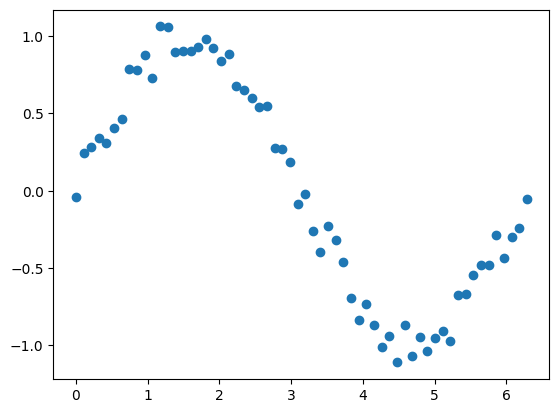

In [3]:
fig, ax = plt.subplots( )

ax.scatter(vector_x, vector_y)

plt.show()

## Implementation Details

### Core Functions

1. **`concatenate_powers(data, n_power)`**
   Creates polynomial features up to degree `n_power`.

2. **`linear_regression(data, to_graph=False)`**
   Implements Ordinary Least Squares linear regression with train-test split.

3. **`linear_regression_ridge(data, alpha, to_graph=False)`**
   Implements Ridge regression (L2 regularization) with train-test split.

4. **`linear_regression_lasso(data, alpha, to_graph=False)`**
    Implements Lasso regression (L1 regularization) with train-test split.


In [4]:
def concatenate_powers(data, n_power):
    """
    Creates polynomial features from input data up to the specified power.

    This function takes a 2D array of data points and generates polynomial features
    by raising the x-values (first column) to powers from 1 to n_power.

    Parameters
    ----------
    data : numpy.ndarray
        Input array of shape (n_samples, 2) where:
        - First column contains x values
        - Second column contains y values (target)
    n_power : int
        Maximum power for polynomial features generation
        Must be positive integer

    Returns
    -------
    numpy.ndarray
        Array of shape (n_samples, n_power + 1) containing:
        - Columns are [x, x^2, x^3, ..., x^n_power, y]
        - Last column contains the original y values
    """

    data_x = data[:, 0]
    data_y = data[:, 1]
    new_data = [data_x]
    for k in range(2, n_power + 1):
        new_data.append(data_x * new_data[-1])

    new_data.append(data_y)
    return np.array(new_data).T

def linear_regression(data, to_graph=False):
    """
    Performs linear regression on the input data using scikit-learn's LinearRegression.

    Parameters
    ----------
    data : numpy.ndarray
        Input array where:
        - All columns except last are features (X)
        - Last column is target variable (y)
    to_graph : bool, optional (default=False)
        If True, creates a scatter plot of original data with the fitted line

    Returns
    -------
    tuple
        Contains:
        - mean_error_test : float
            Mean squared error on test set
        - mean_error_train : float
            Mean squared error on training set
        - coefficients : numpy.ndarray
            Array of fitted coefficients
        - intercept : float
            Intercept term of the linear model
    """

    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)

    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)
    y_train_predicted = reg.predict(x_train)

    mean_error_train = mean_squared_error(y_train, y_train_predicted)
    mean_error_test = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_


    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.title("Linear Regression")
        plt.show()

    return mean_error_test, mean_error_train, coefficients, intercept


def linear_regression_ridge(data, alpha, to_graph=False):
    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)

    """
    Performs Ridge regression (L2 regularization) on the input data.

    Parameters
    ----------
    data : numpy.ndarray
        Input array where:
        - All columns except last are features (X)
        - Last column is target variable (y)
    alpha : float
        Regularization strength parameter
        - Larger values specify stronger regularization
        - Must be positive
    to_graph : bool, optional (default=False)
        If True, creates a scatter plot of original data with the fitted line

    Returns
    -------
    tuple
        Contains:
        - mean_error_test : float
            Mean squared error on test set
        - mean_error_train : float
            Mean squared error on training set
        - coefficients : numpy.ndarray
            Array of fitted coefficients (regularized)
        - intercept : float
            Intercept term of the linear model
    """

    reg = Ridge(alpha, max_iter=10000000)
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)
    y_train_predicted = reg.predict(x_train)

    mean_error_train = mean_squared_error(y_train, y_train_predicted)
    mean_error_test = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_

    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.title(f"Ridge Regression with alpha = {alpha}")
        plt.show()


    return mean_error_test, mean_error_train, coefficients, intercept


def linear_regression_lasso(data, alpha, to_graph=False):
    x_train, x_test, y_train, y_test = train_test_split(data[:,:-1],
                                                                data[:,-1],
                                                                random_state=42)
    """
    Performs Lasso regression (L1 regularization) on the input data.

    Parameters
    ----------
    data : numpy.ndarray
        Input array where:
        - All columns except last are features (X)
        - Last column is target variable (y)
    alpha : float
        Regularization strength parameter
        - Larger values specify stronger regularization
        - Must be positive
    to_graph : bool, optional (default=False)
        If True, creates a scatter plot of original data with the fitted line

    Returns
    -------
    tuple
        Contains:
        - mean_error_test : float
            Mean squared error on test set
        - mean_error_train : float
            Mean squared error on training set
        - coefficients : numpy.ndarray
            Array of fitted coefficients (regularized)
        - intercept : float
            Intercept term of the linear model
    """

    reg = Lasso(alpha, max_iter=10000000)
    reg.fit(x_train, y_train)
    y_test_predicted = reg.predict(x_test)
    y_train_predicted = reg.predict(x_train)

    mean_error_train = mean_squared_error(y_train, y_train_predicted)
    mean_error_test = mean_squared_error(y_test, y_test_predicted)

    coefficients = reg.coef_
    intercept = reg.intercept_

    y_predicted = data[:, :-1] @ coefficients + intercept
    if to_graph:
        fig, ax = plt.subplots( )
        ax.scatter(data[:, 0], data[:, -1])
        ax.plot(data[:, 0], y_predicted)
        plt.title(f"Lasso Regression with alpha = {alpha}")
        plt.show()

    return mean_error_test, mean_error_train, coefficients, intercept

def results_simple_model(data, model):
    """
    Executes and displays results for a specified regression model.

    Parameters
    ----------
    data : numpy.ndarray
        Input array where:
        - All columns except last are features (X)
        - Last column is target variable (y)
    model : list
        Model specification list where:
        - First element is string: 'lineal', 'ridge', or 'lasso'
        - Second element (optional) is float: alpha value for regularization
        Example: ['ridge', 0.1] or ['lineal']

    Returns
    -------
    None
        Prints the following information:
        - Model coefficients
        - Intercept term
        - Mean squared error for training set
        - Mean squared error for test set
    """

    (mean_error_test,
    mean_error_train,
    coefficients,
    intercept) = (0, 0, 0, 0)
    if model[0] == 'lineal':
        (mean_error_test,
         mean_error_train,
         coefficients,
         intercept) = linear_regression(data, True)

    elif model[0] == 'ridge':
        (mean_error_test,
         mean_error_train,
         coefficients,
         intercept) = linear_regression_ridge(data, model[1], True)

    elif model[0] == 'lasso':
        (mean_error_test,
         mean_error_train,
         coefficients,
         intercept) = linear_regression_lasso(data, model[1], True)

    print("Coefficients: ")
    print(coefficients)
    print("Intercept: ")
    print(intercept)
    print("Mean Squared Error Train: ")
    print(mean_error_train)
    print("Mean Squared Error Test: ")
    print(mean_error_test)

## Data Visualization and Model Application

We apply linear regression to the data using a 4th-degree polynomial.

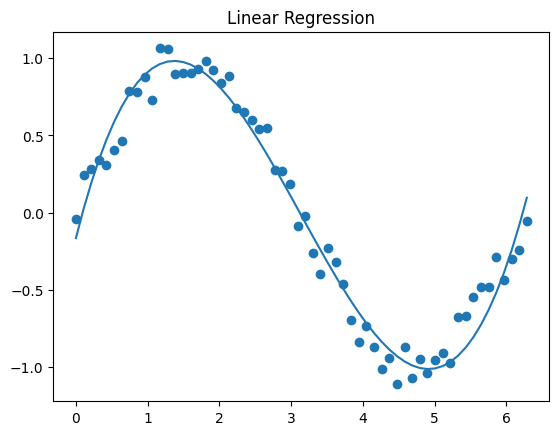

Coefficients: 
[ 1.84770560e+00 -8.67017820e-01  9.47317806e-02 -3.96441950e-04]
Intercept: 
-0.16441699773607124
Mean Squared Error Train: 
0.014687120055187533
Mean Squared Error Test: 
0.017710927875861447


In [5]:
results_simple_model(concatenate_powers(X_data, 4), ['lineal'])

We implement Ridge regression (L2 regularization) using a 4th-degree polynomial.

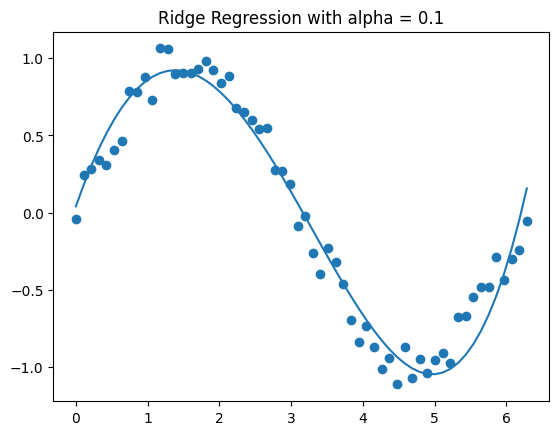

Coefficients: 
[ 1.33958039 -0.54904228  0.0226734   0.0049728 ]
Intercept: 
0.041165441483048876
Mean Squared Error Train: 
0.016591261602988096
Mean Squared Error Test: 
0.023991733064080773


In [6]:
results_simple_model(concatenate_powers(X_data, 4), ['ridge', 0.1])

We then apply Lasso regression (L1 regularization) using a 4th-degree polynomial.

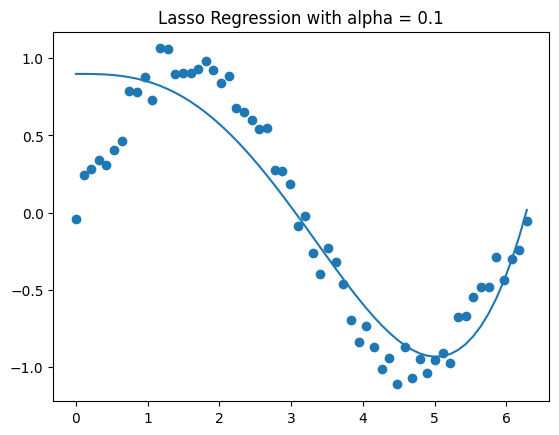

Coefficients: 
[ 0.          0.         -0.05782678  0.0086383 ]
Intercept: 
0.8978475616170012
Mean Squared Error Train: 
0.06423616220472604
Mean Squared Error Test: 
0.11365269969751222


In [7]:
results_simple_model(concatenate_powers(X_data, 4), ['lasso', 0.1])

## Model Comparison and Analysis

We evaluate our models using:
1. Mean Squared Error (MSE) on both training and test sets
2. Visual inspection of fitted curves
3. Grid search over:
   - Polynomial degrees: $[1, 2, 3, 4, 5, 6]$
   - Regularization strengths ($\alpha$)): $[0.001, 0.01, 0.1, 1.0, 10.0]$

In [8]:
def graph_results_greed(results, parameters_model, title):
    """
    Creates a heatmap visualization of grid search results.

    Parameters
    ----------
    results : numpy.ndarray
        2D array of model performance metrics where:
        - Rows represent different polynomial degrees
        - Columns represent different alpha values
    parameters_model : dict
        Dictionary containing:
        - 'alpha': list of alpha values used
        - 'poly_degree': list of polynomial degrees used
    title : str
        Title for the plot

    Returns
    -------
    None
        Displays a heatmap with:
        - X-axis: alpha values
        - Y-axis: polynomial degrees
        - Color intensity: performance metric values
        - Text annotations: actual values in each cell
    """

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('poly_degree')
    ax1.set_xticks(np.arange(len(parameters_model['alpha'])))
    ax1.set_yticks(np.arange(len(parameters_model['poly_degree'] )))
    ax1.set_xticklabels(parameters_model['alpha'])
    ax1.set_yticklabels(parameters_model['poly_degree'])
    ax1.imshow(results, cmap="viridis", origin='lower')

    for i in range( len(parameters_model['poly_degree']) ):
        for j in range( len(parameters_model['alpha']) ):
            if results[i, j] < 0.1 :
                ax1.text(j, i, results[i, j], ha="center", va="center", color="b")
            else :
                ax1.text(j, i, results[i, j], ha="center", va="center", color="w")

    fig.tight_layout()
    plt.title(title)
    plt.show( )

In [9]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
              'poly_degree': [1, 2, 3, 4, 5, 6]}

def grid_search_linear_regression(data_train, model):
    """
    Performs grid search cross-validation for regularized linear regression models.

    Parameters
    ----------
    data_train : numpy.ndarray
        Training data where:
        - All columns except last are features (X)
        - Last column is target variable (y)
    model : str
        Model type: 'lasso' or 'ridge'

    Returns
    -------
    numpy.ndarray
        2D array of shape (len(poly_degree), len(alpha)) containing:
        - Mean cross-validated negative MSE scores
        - Rounded to 2 decimal places
    """

    alpha = {'alpha' : parameters['alpha']}
    degree_poly = parameters['poly_degree']
    mean_results = []
    std_results = []
    y_data_train = data_train[:, -1]
    for degree in degree_poly:
        x_train_poly = concatenate_powers(data_train, degree)[:, :-1]

        if model == 'lasso':
            estimator = Lasso(max_iter=100000000)
        elif model == 'ridge':
            estimator = Ridge(max_iter=10000000)


        grid_search = model_selection.GridSearchCV(estimator,
                                                    alpha,
                                                    cv=5,
                                                    scoring="neg_mean_squared_error")


        grid_search.fit(x_train_poly, y_data_train)


        mean_results.append(-1 * (np.array(pd.DataFrame(grid_search.cv_results_).mean_test_score)))

        std_results.append(np.array(pd.DataFrame(grid_search.cv_results_).std_test_score))

    return np.round(np.array(mean_results), 2), np.round(np.array(std_results), 3)



## Hyperparameter Optimization

We perform grid search to find the optimal combination of:
1. Polynomial degree (ranging from 1 to 6)
2. Regularization parameter ($\alpha$)

for both Lasso and Ridge methods


In [10]:
(x_train,
 x_test,
 y_train,
 y_test) = model_selection.train_test_split(X_data[:, :-1],
                                            X_data[:, -1],
                                            test_size = 0.2,
                                            random_state = 20)

data_train_merge = np.array([x_train, y_train.reshape(-1, 1)]).T[0]

### Lasso Results

In [11]:
lasso_results_mean, lasso_results_std = grid_search_linear_regression(data_train_merge, 'lasso')

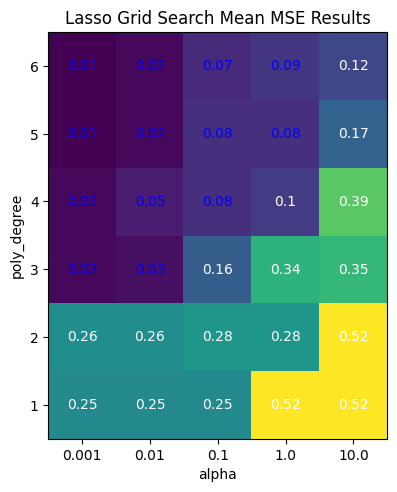

In [12]:
graph_results_greed(lasso_results_mean, parameters, 'Lasso Grid Search Mean MSE Results')

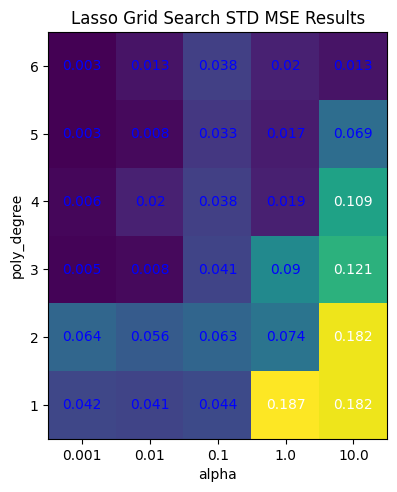

In [13]:
graph_results_greed(lasso_results_std, parameters, 'Lasso Grid Search STD MSE Results')

### BEST MODEL:

The grid search for Lasso regression reveals optimal parameters:
- **Polynomial degree**: 6
- **α (regularization parameter)**: 0.001


### Ridge Results


In [14]:
ridge_results_mean, ridge_results_std = grid_search_linear_regression(data_train_merge, 'ridge')

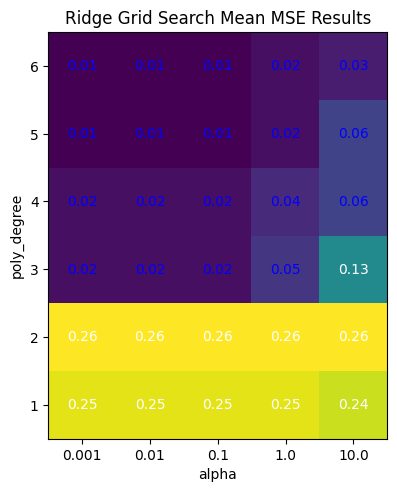

In [15]:
graph_results_greed(ridge_results_mean, parameters, 'Ridge Grid Search Mean MSE Results')

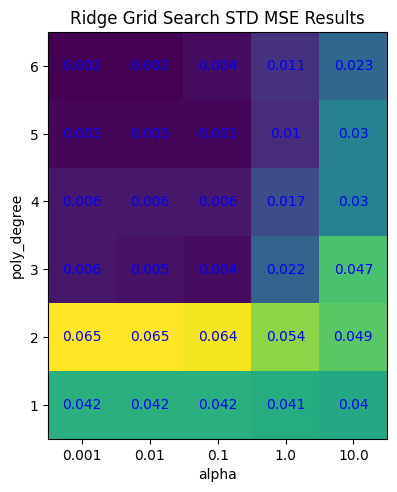

In [16]:
graph_results_greed(ridge_results_std, parameters, 'Ridge Grid Search STD MSE Results')

### BEST MODEL:

The grid search for Ridge regression indicates optimal parameters:
- **Polynomial degree**: 6
- **α (regularization parameter)**: 0.001

## Model Comparison

### Final Models Analysis

#### Lasso Regression (Optimal Configuration)

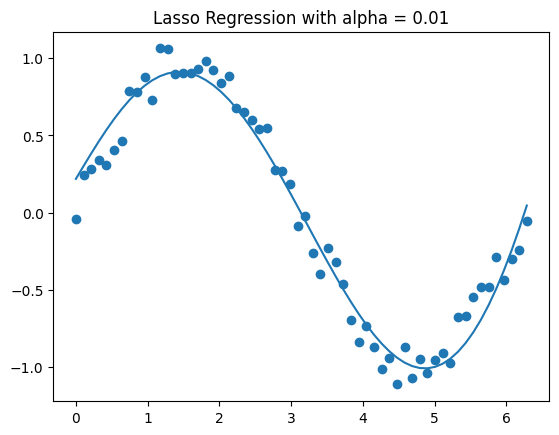

Coefficients: 
[ 0.77873694  0.         -0.20465636  0.04612851 -0.00267485]
Intercept: 
0.21891368960163568
Mean Squared Error Train: 
0.012795604668143081
Mean Squared Error Test: 
0.020592960762140265


In [17]:
results_simple_model(concatenate_powers(X_data, 5), ['lasso', 0.01])

#### Ridge Regression (Optimal Configuration)

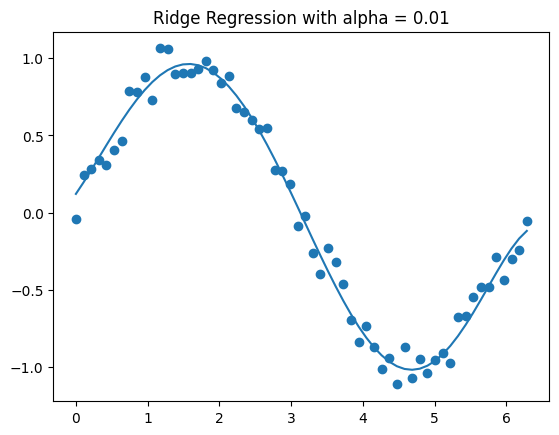

Coefficients: 
[ 6.73053449e-01  2.85594612e-01 -3.13451739e-01  4.64221083e-02
  1.89180895e-03 -4.69180045e-04]
Intercept: 
0.12163790096332658
Mean Squared Error Train: 
0.007391062708932256
Mean Squared Error Test: 
0.008384819960010755


In [18]:
results_simple_model(concatenate_powers(X_data, 6), ['ridge', 0.01])

## Project Conclusions

### Key Results
1. **Optimal Model Configuration**
   - Best performing model: Ridge Regression
   - Optimal polynomial degree: 6
   - Optimal $alpha$: 0.01

2. **Model Comparison**
   - Simple linear regression: Underfits the data
   - Lasso tends to create sparser solutions
   - Ridge provides the best balance of fit and generalization

3. **Practical Implications**
   - Cross-validation helps find optimal hyperparameters
   - Visual inspection confirms model performance
